In [1]:
import pandas as pd
import numpy as np
import nltk

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils.multiclass import unique_labels

In [5]:
# Load the dataset from a CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_LAB_PPS_2.0/IMDB_MOVIE_REVIEWS_DATASET_CLASSIFIED.csv')

# Extract the reviews and labels
reviews = df['Review'].tolist()
labels = df['Sentiment_Labels'].tolist()
df = df.iloc[:, 0:2]
df

,Review,Sentiment_Labels
0,Some birds aren't meant to be caged.,positive
1,An incredible movie. One that lives with you.,positive
2,Don't Rent Shawshank.,positive
3,This is How Movies Should Be Made,positive
4,A classic piece of unforgettable film-making.,positive
...,...,...
505418,"Very good technically, but depressing.",negative
505419,Pointless nihilistic bullshit,negative
505420,"good movie, but wished there had been less foc...",positive
505421,Splendid,positive


In [6]:
def no_of_words(text):
    words= text.split()
    word_count = len(words)
    return word_count

In [7]:
df['word count'] = df['Review'].apply(no_of_words)
df

,Review,Sentiment_Labels,word count
0,Some birds aren't meant to be caged.,positive,7
1,An incredible movie. One that lives with you.,positive,8
2,Don't Rent Shawshank.,positive,3
3,This is How Movies Should Be Made,positive,7
4,A classic piece of unforgettable film-making.,positive,6
...,...,...,...
505418,"Very good technically, but depressing.",negative,5
505419,Pointless nihilistic bullshit,negative,3
505420,"good movie, but wished there had been less foc...",positive,22
505421,Splendid,positive,1


In [8]:
df.Sentiment_Labels.replace("positive", 1, inplace=True)
df.Sentiment_Labels.replace("negative", 0, inplace=True)
df

,Review,Sentiment_Labels,word count
0,Some birds aren't meant to be caged.,1,7
1,An incredible movie. One that lives with you.,1,8
2,Don't Rent Shawshank.,1,3
3,This is How Movies Should Be Made,1,7
4,A classic piece of unforgettable film-making.,1,6
...,...,...,...
505418,"Very good technically, but depressing.",0,5
505419,Pointless nihilistic bullshit,0,3
505420,"good movie, but wished there had been less foc...",1,22
505421,Splendid,1,1


#**2. Apply pre-processing techniques such as**
* Stopwords Removal
* URL Removal
* Stemming
* Lemmatization
* Convert Numbers to Words
* Tokenization
* Unigram/Bigram Approach
etc.,

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [10]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
def data_processing(text):
    text = text.lower()
    text = re.sub('<br />', '', text) 
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^\w\s]','', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [12]:
df.Review = df['Review'].apply(data_processing)

In [13]:
df['word count'] = df['Review'].apply(no_of_words)
df

,Review,Sentiment_Labels,word count
0,birds arent meant caged,1,4
1,incredible movie one lives,1,4
2,dont rent shawshank,1,3
3,movies made,1,2
4,classic piece unforgettable filmmaking,1,4
...,...,...,...
505418,good technically depressing,0,3
505419,pointless nihilistic bullshit,0,3
505420,good movie wished less focus criminal investig...,1,12
505421,splendid,1,1


In [14]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  170937


In [15]:
df = df.drop_duplicates('Review')

In [16]:
duplicated_count = df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  0


In [17]:
df

,Review,Sentiment_Labels,word count
0,birds arent meant caged,1,4
1,incredible movie one lives,1,4
2,dont rent shawshank,1,3
3,movies made,1,2
4,classic piece unforgettable filmmaking,1,4
...,...,...,...
505417,id love worship temple sean devine,1,6
505418,good technically depressing,0,3
505419,pointless nihilistic bullshit,0,3
505420,good movie wished less focus criminal investig...,1,12


In [18]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [19]:
df.Review = df['Review'].apply(lambda x: stemming(x))

<ipython-input-19-7f7ba0b56a40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Review = df['Review'].apply(lambda x: stemming(x))


In [20]:
df['word count'] = df['Review'].apply(no_of_words)
df

<ipython-input-20-3238c7d1186f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word count'] = df['Review'].apply(no_of_words)


,Review,Sentiment_Labels,word count
0,birds arent meant caged,1,4
1,incredible movie one lives,1,4
2,dont rent shawshank,1,3
3,movies made,1,2
4,classic piece unforgettable filmmaking,1,4
...,...,...,...
505417,id love worship temple sean devine,1,6
505418,good technically depressing,0,3
505419,pointless nihilistic bullshit,0,3
505420,good movie wished less focus criminal investig...,1,12


In [21]:
pos_reviews = df[df.Sentiment_Labels ==1]
pos_reviews.head()

,Review,Sentiment_Labels,word count
0,birds arent meant caged,1,4
1,incredible movie one lives,1,4
2,dont rent shawshank,1,3
3,movies made,1,2
4,classic piece unforgettable filmmaking,1,4


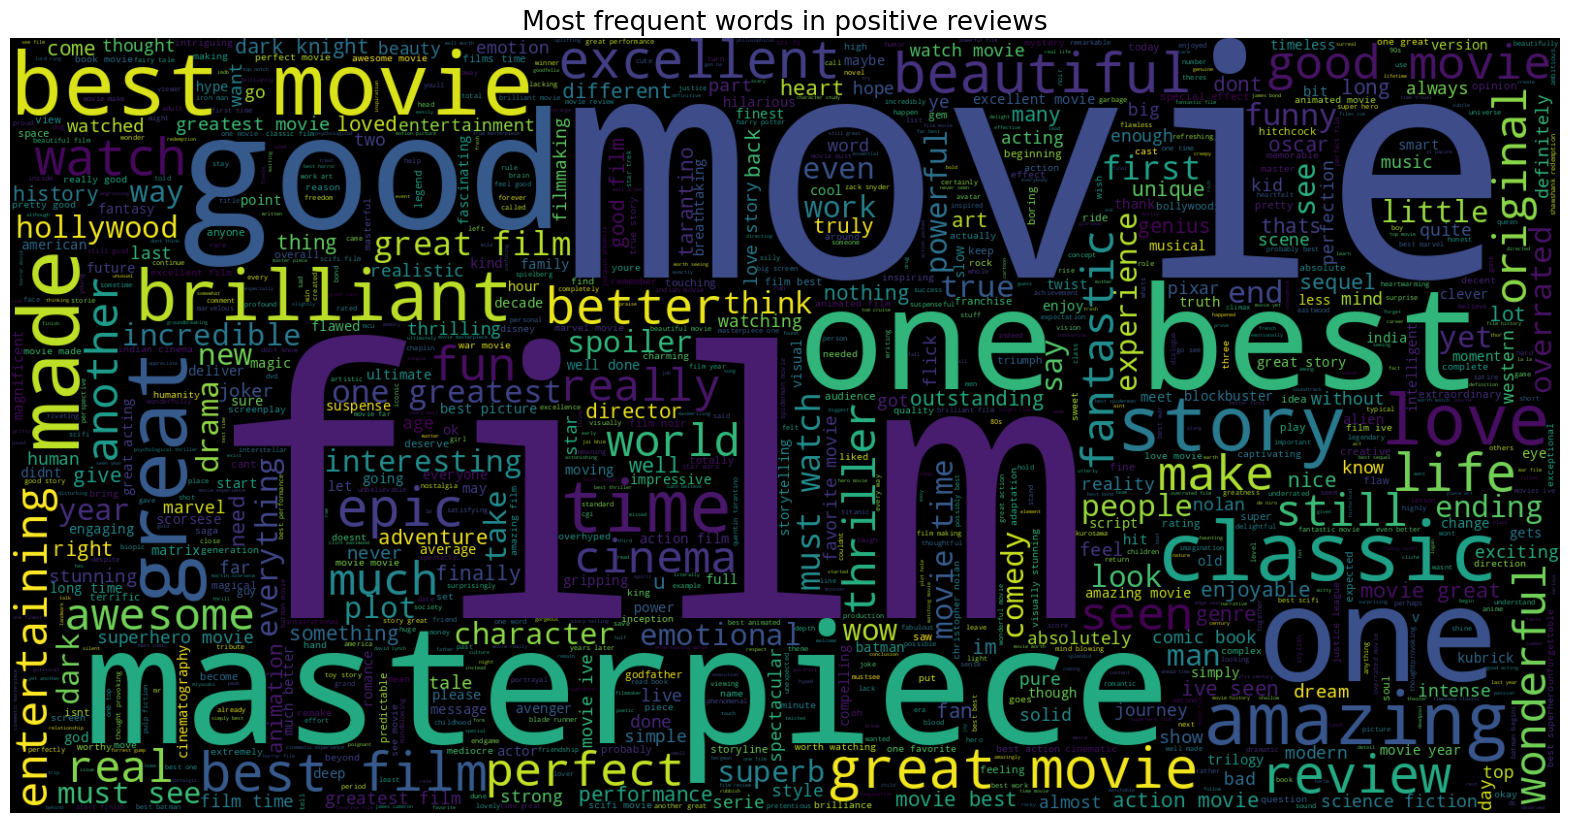

In [22]:
text = ' '.join([word for word in pos_reviews['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive reviews', fontsize = 19)
plt.show()

In [23]:
from collections import Counter
count = Counter()
for text in pos_reviews['Review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(1000)

[('movie', 40578),
 ('film', 24643),
 ('best', 23321),
 ('one', 15740),
 ('great', 15328),
 ('good', 11713),
 ('ever', 10369),
 ('time', 7779),
 ('story', 7682),
 ('masterpiece', 7651),
 ('movies', 6019),
 ('classic', 5442),
 ('watch', 5259),
 ('made', 4898),
 ('amazing', 4571),
 ('love', 4498),
 ('like', 4449),
 ('greatest', 4293),
 ('better', 4291),
 ('films', 4082),
 ('beautiful', 4001),
 ('seen', 3832),
 ('brilliant', 3825),
 ('action', 3688),
 ('see', 3682),
 ('excellent', 3668),
 ('perfect', 3539),
 ('life', 3522),
 ('still', 3469),
 ('well', 3215),
 ('epic', 3148),
 ('dont', 2973),
 ('cinema', 2965),
 ('must', 2938),
 ('review', 2844),
 ('first', 2728),
 ('much', 2723),
 ('really', 2648),
 ('fun', 2512),
 ('dark', 2463),
 ('years', 2461),
 ('way', 2429),
 ('acting', 2394),
 ('true', 2370),
 ('another', 2367),
 ('overrated', 2345),
 ('thriller', 2281),
 ('scifi', 2203),
 ('ive', 2173),
 ('new', 2168),
 ('long', 2138),
 ('entertaining', 2099),
 ('never', 2098),
 ('awesome', 2091),

In [24]:
pos_words = pd.DataFrame(count.most_common(1000))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,movie,40578
1,film,24643
2,best,23321
3,one,15740
4,great,15328


In [25]:
px.bar(pos_words, x='word', y='count', title='Common words in positive reviews', color='word')

In [26]:
neg_reviews = df[df.Sentiment_Labels == 0]
neg_reviews.head()

,Review,Sentiment_Labels,word count
10,alltime prison film classic,0,4
16,go prison learn crook,0,4
18,im convicted murderer provides sound financial...,0,7
20,never give hope,0,3
23,shawshank redemption prison film redeemed quality,0,6


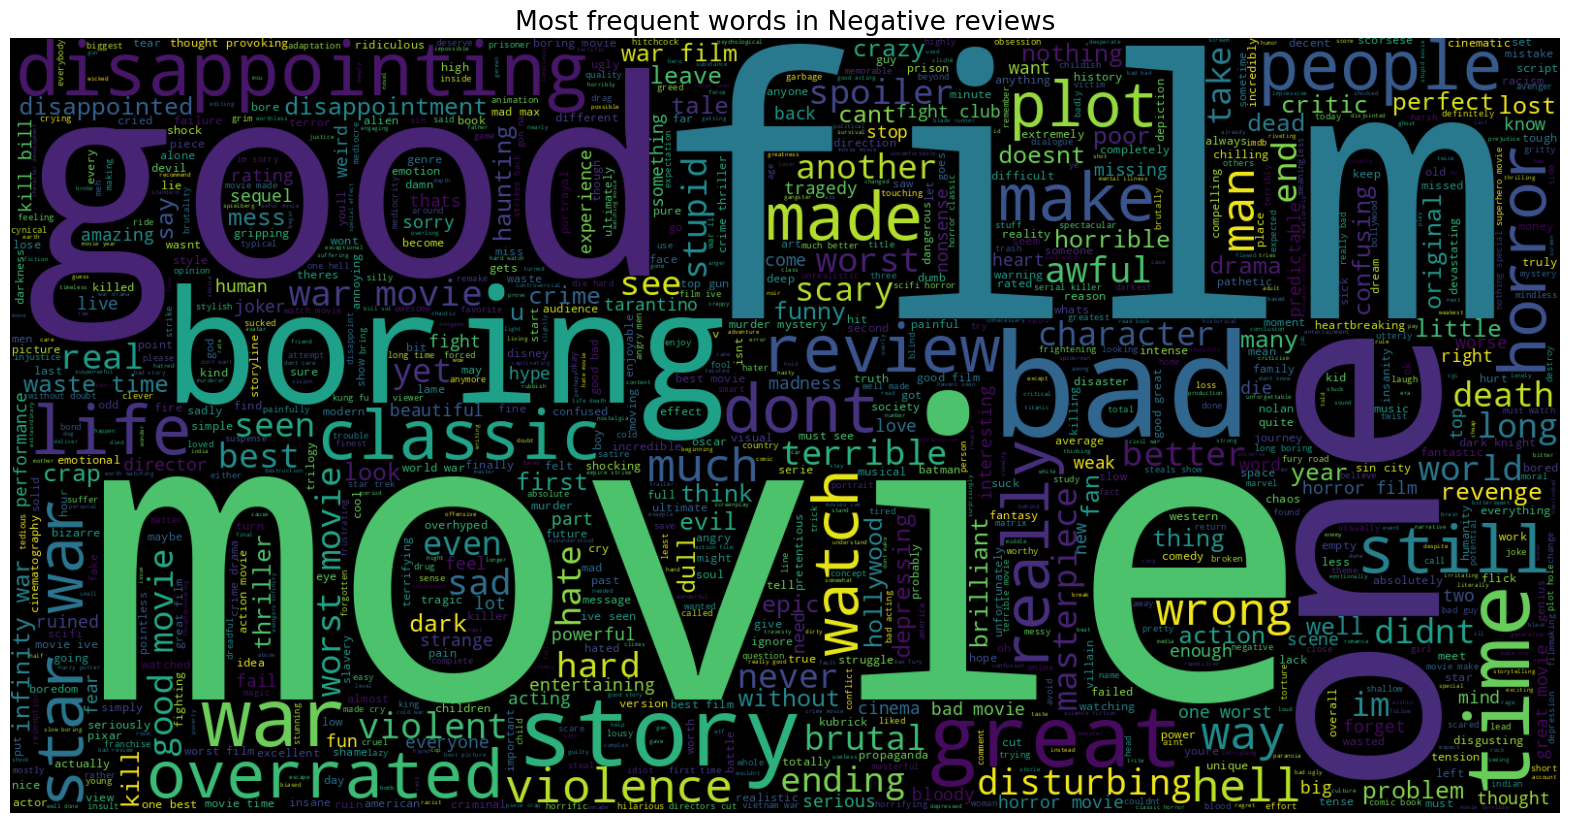

In [27]:
text = ' '.join([word for word in neg_reviews['Review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=1000, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in Negative reviews', fontsize = 19)
plt.show()

In [28]:
count = Counter()
for text in neg_reviews['Review'].values:
    for word in text.split():
        count[word] += 1
count.most_common(1000)

[('movie', 7270),
 ('film', 4106),
 ('good', 3064),
 ('war', 2362),
 ('bad', 2105),
 ('one', 2092),
 ('boring', 1885),
 ('story', 1417),
 ('time', 1402),
 ('ever', 1401),
 ('great', 1315),
 ('worst', 1299),
 ('like', 1294),
 ('horror', 1172),
 ('dont', 1130),
 ('movies', 857),
 ('best', 816),
 ('watch', 815),
 ('classic', 768),
 ('disappointing', 750),
 ('made', 746),
 ('people', 724),
 ('overrated', 722),
 ('life', 713),
 ('star', 674),
 ('hard', 665),
 ('crime', 665),
 ('really', 661),
 ('seen', 657),
 ('wrong', 628),
 ('plot', 603),
 ('see', 598),
 ('still', 589),
 ('much', 584),
 ('long', 584),
 ('better', 582),
 ('wars', 576),
 ('way', 569),
 ('hell', 564),
 ('never', 560),
 ('world', 557),
 ('disturbing', 552),
 ('violence', 550),
 ('make', 547),
 ('man', 544),
 ('waste', 542),
 ('get', 540),
 ('poor', 539),
 ('films', 527),
 ('terrible', 522),
 ('awful', 505),
 ('didnt', 498),
 ('sad', 498),
 ('im', 496),
 ('action', 496),
 ('first', 491),
 ('well', 488),
 ('dark', 487),
 ('endi

In [29]:
neg_words = pd.DataFrame(count.most_common(1000))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,7270
1,film,4106
2,good,3064
3,war,2362
4,bad,2105


In [30]:
px.bar(neg_words, x='word', y='count', title='Common words in negative reviews', color='word')

#**3. Apply feature selection algorithms to extract the predominant features.**


In [31]:
review_dataset = df.iloc[:, 0:2]
review_dataset.columns = ['review', 'label']
review_dataset

,review,label
0,birds arent meant caged,1
1,incredible movie one lives,1
2,dont rent shawshank,1
3,movies made,1
4,classic piece unforgettable filmmaking,1
...,...,...
505417,id love worship temple sean devine,1
505418,good technically depressing,0
505419,pointless nihilistic bullshit,0
505420,good movie wished less focus criminal investig...,1


In [32]:
review_dataset.label.replace(1, "positive", inplace=True)
review_dataset.label.replace(0, "negative", inplace=True)
review_dataset

,review,label
0,birds arent meant caged,positive
1,incredible movie one lives,positive
2,dont rent shawshank,positive
3,movies made,positive
4,classic piece unforgettable filmmaking,positive
...,...,...
505417,id love worship temple sean devine,positive
505418,good technically depressing,negative
505419,pointless nihilistic bullshit,negative
505420,good movie wished less focus criminal investig...,positive


In [33]:
review_dataset.groupby('label').count()

,review
label,
negative,57416
positive,275731


In [34]:
review_dataset['label'].value_counts(normalize=True)

positive    0.827656
negative    0.172344
Name: label, dtype: float64

In [35]:
#splitting into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(review_dataset['review'],
                                                    review_dataset['label'],
                                                    random_state = 0)

In [36]:
#feature extraction: ngram

vectorizer = CountVectorizer(ngram_range = (1, 2)).fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)

X_train_vectorized.toarray().shape

(249860, 471087)

#**4. Use Classification algorithms for classification such as**
* a. Naive Bayes
* b. Multinomial Naive Bayes
* c. SVM
* d. Random Forest

In [37]:
#creating multinomial naive bayes

review_predictor = MultinomialNB(alpha = 0.1)
review_predictor.fit(X_train_vectorized, Y_train)

MultinomialNB(alpha=0.1)

In [38]:
#using test dataset

predictions = review_predictor.predict(vectorizer.transform(X_test))
print("Accuracy: ", 100 * sum(predictions == Y_test) / len(predictions), "%")

Accuracy:  89.64784420137596 %


In [39]:
#using real life examples

review_predictor.predict(vectorizer.transform(
    [
        "Good Movie",
        "Worth to watch",
        "Worst Movie ever",
        "Waste of time and Money"
    ]
))

array(['positive', 'positive', 'negative', 'negative'], dtype='<U8')

#**5. Interpret the result**
a. Print confusion matrix

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

Confusion Matrix:
[[65279  3644]
 [ 4978  9386]]


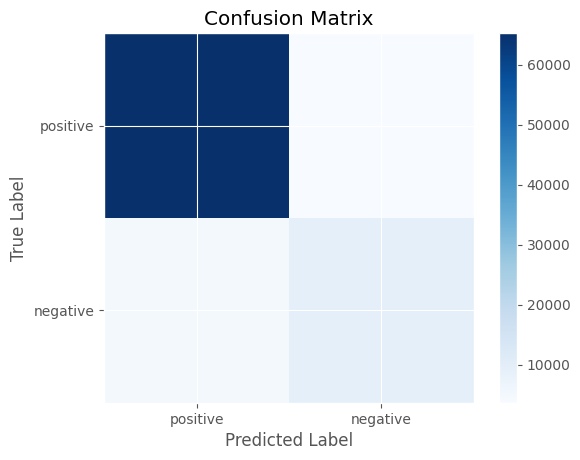

In [41]:
# Create a confusion matrix
cm = confusion_matrix(Y_test, predictions, labels=["positive", "negative"])

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(["positive", "negative"]))
plt.xticks(tick_marks, ["positive", "negative"])
plt.yticks(tick_marks, ["positive", "negative"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
